In [135]:
import os
import shutil
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore, skew

In [136]:
os.getcwd()

'C:\\Users\\Ajinkya\\Desktop\\Omkar Programs\\Assignments\\Datasets\\Datasets Solutions\\medical_insurance_solution'

In [137]:
file = r"C:\Users\Ajinkya\Desktop\Omkar Programs\Assignments\Datasets\medical_insurance.csv"
destination = 'C:\\Users\\Ajinkya\\Desktop\\Omkar Programs\\Assignments\\Datasets\\Datasets Solutions'
shutil.copy(file, destination)

'C:\\Users\\Ajinkya\\Desktop\\Omkar Programs\\Assignments\\Datasets\\Datasets Solutions\\medical_insurance.csv'

# Problem Statement

# Data Gathering

In [138]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [141]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

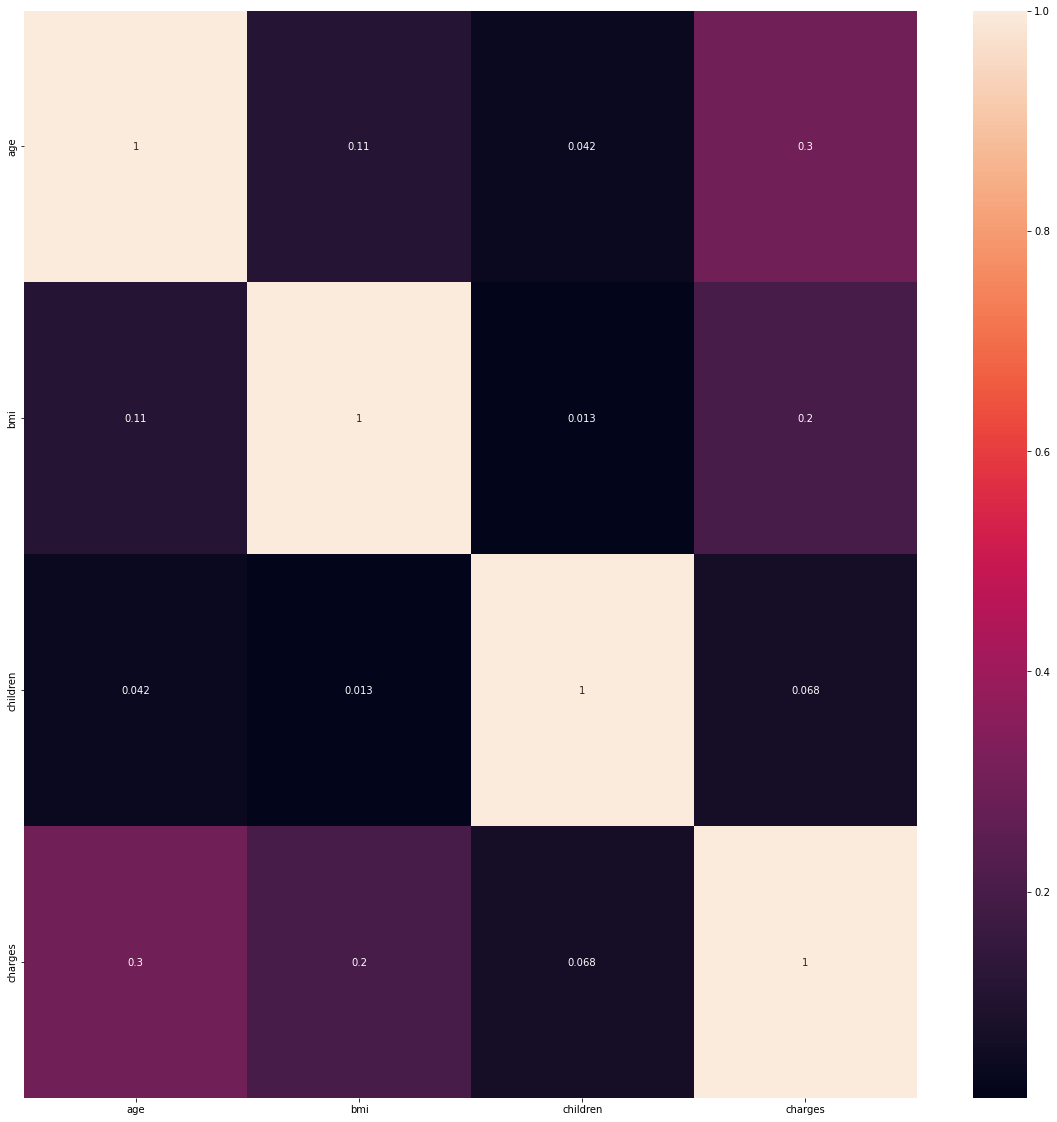

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

## 1) age

In [143]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### Checking outliers in age

<AxesSubplot:xlabel='age', ylabel='Density'>

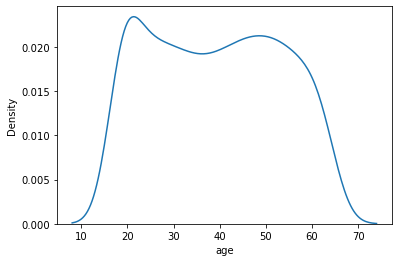

In [144]:
# Outlier detection by using z_score method

sns.kdeplot(x = df['age'])

In [145]:
skew(df['age'])

0.055610083072599126

In [146]:
z_score_value = np.abs(zscore(df['age']))
z_score_value

0       1.438764
1       1.509965
2       0.797954
3       0.441948
4       0.513149
          ...   
1333    0.768473
1334    1.509965
1335    1.509965
1336    1.296362
1337    1.551686
Name: age, Length: 1338, dtype: float64

In [147]:
outlier_index = np.where(z_score_value >= 2)[0]
outlier_values = df['age'][outlier_index]
outlier_values

Series([], Name: age, dtype: int64)

In [148]:
# Outlier detection by using IQR method

<AxesSubplot:>

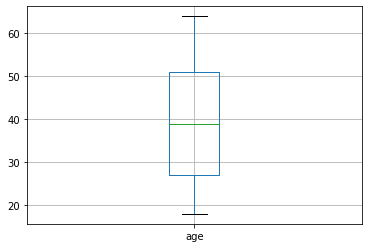

In [149]:
df[['age']].boxplot()

In [150]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
median = df['age'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 27.0
Q2 : 39.0
Q3 : 51.0
Median : 39.0
upper_tail : 87.0
lower_tail : -9.0


In [151]:
df[['age']].loc[df['age'] > upper_tail]

,age


In [152]:
df[['age']].loc[df['age'] < lower_tail]

,age


## 2) sex

In [153]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [154]:
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)

In [155]:
sex_values = {'male': 1, 'female': 0}

## 3) bmi

In [156]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

### Checking outliers in bmi

<AxesSubplot:xlabel='bmi', ylabel='Density'>

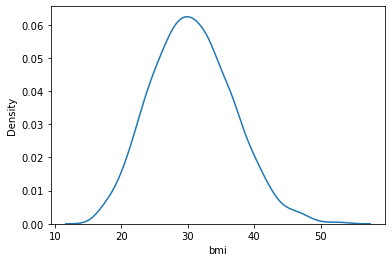

In [157]:
# Outlier detection by using z_score method

sns.kdeplot(x = df['bmi'])

In [158]:
skew(df['bmi'])

0.28372857291709386

In [159]:
z_score_value = np.abs(zscore(df['bmi']))

outlier_index = np.where(z_score_value >= 2)[0]

outlier_values = df['bmi'][outlier_index]

outlier_values

28      17.385
116     49.060
128     17.765
172     15.960
198     18.050
232     17.800
250     17.290
286     48.070
292     45.540
356     43.890
380     17.955
383     43.340
401     47.520
410     17.480
412     17.195
428     16.815
438     46.750
442     43.010
454     46.530
493     43.400
521     44.220
543     47.410
547     46.700
549     46.200
563     44.770
572     43.120
582     45.430
660     46.530
674     43.890
680     17.400
701     44.745
796     44.220
811     42.940
821     17.670
847     50.380
860     47.600
867     43.700
895     44.000
930     46.530
941     46.090
950     18.335
951     42.900
1024    45.320
1029    17.290
1047    52.580
1074    18.335
1085    18.300
1088    47.740
1131    45.900
1133    18.335
1156    44.880
1205    17.860
1226    16.815
1286    17.290
1312    42.900
1317    53.130
1332    44.700
Name: bmi, dtype: float64

In [160]:
# Outlier detection by using IQR method

<AxesSubplot:>

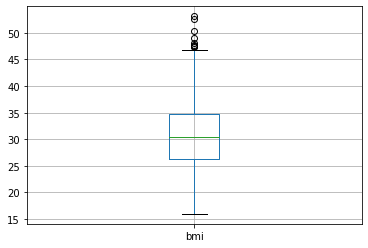

In [161]:
df[['bmi']].boxplot()

In [162]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
median = df['bmi'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
Median : 30.4
upper_tail : 47.290000000000006
lower_tail : 13.7


In [163]:
df[['bmi']].loc[df['bmi'] > upper_tail]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [164]:
df[['bmi']].loc[df['bmi'] < lower_tail]

,bmi


## 4) children

In [165]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Checking outliers in children

<AxesSubplot:xlabel='children', ylabel='Density'>

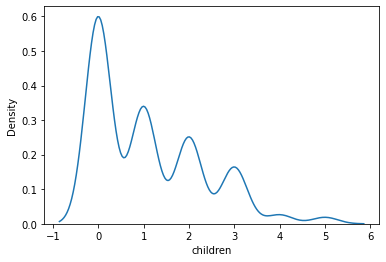

In [166]:
# Outlier detection by using z_score method

sns.kdeplot(x = df['children'])

In [167]:
skew(df['children'])   # we can't use Z-score method here as skew not lies in between good range i.e. -0.5 to 0.5

0.9373281163874423

<AxesSubplot:>

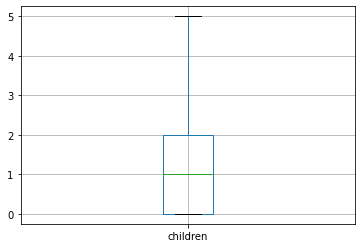

In [168]:
# Outlier detection by using IQR method

df[['children']].boxplot()

In [169]:
q1 = df['children'].quantile(0.25)
q2 = df['children'].quantile(0.50)
q3 = df['children'].quantile(0.75)
median = df['children'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 0.0
Q2 : 1.0
Q3 : 2.0
Median : 1.0
upper_tail : 5.0
lower_tail : -3.0


In [170]:
df[['children']].loc[df['children'] > upper_tail]

,children


In [171]:
df[['children']].loc[df['children'] < lower_tail]

,children


## 5) smoker 

In [172]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [173]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [174]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)

In [175]:
smoker_value = {'no': 0, 'yes': 1}

## 6) region

In [176]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [177]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


# Model Training

## 1. Model training by linear regression

In [178]:
reg_model = LinearRegression()
reg_model

LinearRegression()

In [179]:
x = df.drop("charges", axis = 1)
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [180]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [182]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [183]:
# Training Datasets

y_pred_train = reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35000135.31385897
RMSE : 5916.091219196926
MAE : 4080.1255429909843
R Squared : 0.7636624681782705


In [184]:
# Testing Datasets

y_pred = reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 42730364.68387247
RMSE : 6536.846692700729
MAE : 4555.0985825133685
R Squared : 0.6953286838318306


## 2. Model training by Ridge Regression

### 2.1 Ridge regression by using Gridsearch CV

In [185]:
ridge_model = Ridge()
ridge_model

Ridge()

In [186]:
para_grid = {'alpha' : np.arange(0.01,3,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model, para_grid)

gscv_ridge_model.fit(x_train, y_train)

gscv_ridge_model.best_estimator_

Ridge(alpha=1.01)

In [187]:
# Training Datasets

ridge_model = Ridge(alpha=1.01)

ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35003367.35134272
RMSE : 5916.364369386213
MAE : 4090.3496572150875
R Squared : 0.7636406439265979


In [188]:
# Testing Datasets

y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 42669760.321688786
RMSE : 6532.209451761998
MAE : 4560.431300289383
R Squared : 0.6957607983463834


### 2.2 Ridge regression by using RandomizedSearch CV

In [189]:
ridge_model = Ridge()
ridge_model

Ridge()

In [190]:
para_grid = {'alpha' : np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, para_grid)

rscv_ridge_model.fit(x_train, y_train)

rscv_ridge_model.best_estimator_

Ridge(alpha=0.72)

In [207]:
# Training Datasets

ridge_model = Ridge(alpha=0.72)

ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35001783.42212787
RMSE : 5916.230507859534
MAE : 4087.416679629998
R Squared : 0.7636513393687115


In [208]:
# Testing Datasets

y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 42686384.55345108
RMSE : 6533.481809376305
MAE : 4558.879688497716
R Squared : 0.6956422660893157


## 3. Model training by Lasso Regression

### 3.1 Lasso regression by using Gridsearch CV

In [193]:
lasso_model = Lasso()
lasso_model

Lasso()

In [194]:
para_grid = {'alpha' : np.arange(0.01,3,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model, para_grid)

gscv_lasso_model.fit(x_train, y_train)

gscv_lasso_model.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.801e+08, tolerance: 1.264e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.802e+08, tolerance: 1.264e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.9899999999999998)

In [195]:
# Training Datasets

lasso_model = Lasso(alpha=2.9899999999999998)

lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35000400.152698725
RMSE : 5916.113602078541
MAE : 4080.98021643371
R Squared : 0.7636606798606782


In [196]:
# Testing Datasets

y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 42725144.47362629
RMSE : 6536.447389341269
MAE : 4555.432379079792
R Squared : 0.695365904397069


### 3.2 Lasso regression by using RandomizedSearch CV

In [197]:
lasso_model = Lasso()
lasso_model

Lasso()

In [198]:
para_grid = {'alpha' : np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model, para_grid)

rscv_lasso_model.fit(x_train, y_train)

rscv_lasso_model.best_estimator_

Lasso(alpha=2.98)

In [209]:
# Training Datasets

lasso_model = Lasso(alpha=2.98)

lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :", r2)

MSE : 35000398.35991917
RMSE : 5916.1134505618775
MAE : 4080.9771569204577
R Squared : 0.7636606919663769


In [210]:
# Testing Datasets

y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :", r2)

MSE : 42725159.657995194
RMSE : 6536.448550856589
MAE : 4555.431161680579
R Squared : 0.6953657961311627


# Testing on single row

In [211]:
print(sex_values)
print(smoker_value)

{'male': 1, 'female': 0}
{'no': 0, 'yes': 1}


## Values Entered by User

In [212]:
age = 50
sex = "male"
bmi = 25
children = 3
smoker = "no"
region = "northwest"

## Define column names

In [213]:
region_col = "region_" + region
print(region_col)

region_northwest


In [214]:
region_index = np.where(x.columns == region_col)[0][0]
print(region_index)

6


In [215]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

# creating array for predictions

In [216]:
array = np.zeros(len(column_names), dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [218]:
array[0] = age
array[1] = sex_values[sex]
array[2] = bmi
array[3] = children
array[4] = smoker_value[smoker]
array[region_index] = 1

array

array([50,  1, 25,  3,  0,  0,  1,  0,  0])

In [219]:
predicted_price = reg_model.predict([array])[0]
print("Predicted Price of Medical Insurance is :",predicted_price, "/- Rs. Only.")

Predicted Price of Medical Insurance is : 10269.20393989485 /- Rs. Only.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Creating json file

In [220]:
label_encoded_dict = ({"sex_values":sex_values, "smoker_value":smoker_value, "columns":list(column_names)})
label_encoded_dict

{'sex_values': {'male': 1, 'female': 0},
 'smoker_value': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [222]:
import json
with open ("Medical_data.json", "w") as f:
    json.dump(label_encoded_dict, f)

# Creating Pickle file

In [223]:
import pickle
with open ("Medical_model.pkl", "wb") as f:
    pickle.dump(reg_model, f)